In [1]:
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from collections import defaultdict
from tqdm import tqdm

%matplotlib inline

In [34]:
tf.config.set_visible_devices([], 'GPU')

In [3]:
with open("./train.data.jsonl", "r") as f:
    raw_lines_train = f.readlines()
with open("./train.label.json", "r") as f:
    raw_labels_train = f.readlines()

with open("./dev.data.jsonl", "r") as f:
    raw_lines_dev = f.readlines()

with open("./dev.label.json", "r") as f:
    raw_labels_dev = f.readlines()

In [4]:
json_lines_train = [json.loads(line) for line in raw_lines_train]
json_labels_train = [json.loads(line) for line in raw_labels_train][0]

json_lines_dev = [json.loads(line) for line in raw_lines_dev]
json_labels_dev = [json.loads(line) for line in raw_labels_dev][0]

In [5]:
print("CLEAR ME")

CLEAR ME


In [6]:
print(len(raw_lines_train))
print(len(raw_lines_dev))

4641
580


29 38
30 36
16 124
14 103
13 129
21 151
5 179
12 136
9 169
10 171
19 233
23 102
26 45
20 273
18 155
15 114
28 36
34 30
11 149
8 186
32 30
25 75
4 194
3 171
1 276
2 148
36 23
44 11
6 181
22 122
50 9
42 13
46 11
54 7
17 124
7 180
24 79
35 23
43 9
37 24
48 9
45 10
59 4
40 9
56 5
39 28
27 47
31 22
33 22
47 16
53 10
41 6
38 17
51 7
55 7
60 5
52 8
57 9
58 4
49 11
9


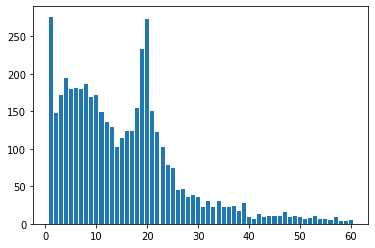

In [7]:
length_counts = defaultdict(int)

for json_line in json_lines_train:
    length_counts[len(json_line)] += 1

(lx, ly) = ([], [])

max_size = 0

for (replies, num_replies) in length_counts.items():
    max_size = max(max_size, replies)
    if replies > 60:
        continue
    lx.append(replies)
    ly.append(num_replies)
    print(replies, num_replies)
    
plt.bar(lx, ly)
print(length_counts[50])

In [8]:
max_size

346

In [9]:
import spacy

nlp = spacy.load("en_core_web_trf")

C:\ProgramData\Anaconda3\lib\site-packages\cupy\_environment.py:210: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [10]:
files_present = True

In [11]:
from tqdm import tqdm

MAX_FEATURES = 40

def process_lines(lines):
    myX = []
    i = 0
    shape = None

    for doc in nlp.pipe(map(lambda x: x['text'], lines[:MAX_FEATURES])):
        shape = doc._.trf_data.tensors[-1].shape[1]
        myX.append(doc._.trf_data.tensors[-1].reshape(shape))
        i += 1

        # Add zero matrices to the remaining
    for _ in range(i, MAX_FEATURES):
        myX.append(np.zeros(shape))
    
    return myX

def getXY():
    X = []
    Y = []
    MAX_FEATURES = 40
    for lines in tqdm(json_lines_train):
        Y.append(0 if json_labels_train[lines[0]['id_str']] == 'non-rumour' else 1) 
        X.append(process_lines(lines))
    return X, Y

if files_present:
    X = np.load("./train_matrix.npy")
    Y = np.load("./train_labels.npy")
else:
    X, Y = getXY()


In [13]:
myX = np.expand_dims(X, axis=3)

In [14]:
myX.shape

(4641, 40, 768, 1)

['hello', '!', 'world', '<', '3', 'i', "'", 'm', 'kinda', 'keen']

In [11]:
def getText(json_lines, json_labels):
    X = []
    Y = []
    
    for lines in json_lines:
        X.append(list(map(lambda x: x['text'], lines)))
        Y.append(0 if json_labels[lines[0]['id_str']] == 'non-rumour' else 1)
    return X, Y
    

In [12]:
X, Y = getText(json_lines_train, json_labels_train)

In [13]:
X[12]

['Hostage taker in Sydney cafe demands ISIS flag and call with Australian PM, Sky News reports. http://t.co/a2vgrn30Xh #sydneysiege',
 "@cnni So they noticed they had the wrong flag and decided to ask for the right one... Wow, these 'terrorists' sound supremely incompetent.",
 '@harryjohal1982 @cnni bouyt time u didd',
 'MT “@cnni: Hostage taker in Sydney cafe demands ISIS flag and call with Australian PM, Sky News reports. #sydneysiege”',
 '@rupayanb @SohamDeGuevara @cnni How to Create an "Islamic Enemy" - http://t.co/mzxzVWDkH1',
 '@cnni avnt they shot him yet',
 '@cnni just send em a Bart Simson flag w/the👉middle finger and a bullet',
 "@NickWaite7 @cnni we don't shoot in Australia",
 '@cnni Shoot him',
 '@harryjohal1982 Yes, and it would seem the terrorists are positively counting on that.   @NickWaite7 @cnni',
 '@cnni must be shot in head through snipers.',
 '@cnni Yes, surely the Australian government has ISIS flags ready to give just for this moment.',
 "@NickWaite7 @cnni it's c

In [14]:
' [ENDSENT] '.join(["abc", "def"])

'abc [ENDSENT] def'

In [15]:
Y[12]

1

In [16]:
index = 26

print(json_labels_train[json_lines_train[index][0]['id_str']])
print(json.dumps(json_lines_train[index][0], indent=2))



rumour
{
  "contributors": null,
  "truncated": false,
  "text": "BREAKING: Hostages taken in central #Sydney caf\u00e9, jihadist flag held against window http://t.co/7hJUmKz1eY http://t.co/TeK7ZjFHm6",
  "in_reply_to_status_id": null,
  "id": 544285296565948416,
  "favorite_count": 123,
  "source": "<a href=\"https://about.twitter.com/products/tweetdeck\" rel=\"nofollow\">TweetDeck</a>",
  "retweeted": false,
  "coordinates": null,
  "entities": {
    "symbols": [],
    "media": [
      {
        "expanded_url": "http://twitter.com/RT_com/status/544285296565948416/photo/1",
        "display_url": "pic.twitter.com/TeK7ZjFHm6",
        "url": "http://t.co/TeK7ZjFHm6",
        "media_url_https": "https://pbs.twimg.com/media/B42uliVCIAEC_uo.jpg",
        "id_str": "544283089875116033",
        "sizes": {
          "large": {
            "h": 337,
            "resize": "fit",
            "w": 600
          },
          "small": {
            "h": 190,
            "resize": "fit",
         

In [17]:
json_labels_train['525003253185277952']

'non-rumour'

## Important factors
* Information Density
* Follower count
* Verified or not - We are fully confident that this is not an artifical actor, this likely is a good spam filtering feature. 
* Is news channel or not
* feelings or factual ? Does it make a statement or is it vague ? This is vaguely correlated with sentiment analysis. Scores on the extreme ends of sentiment analysis tend to be feeling heavy while vague statements tend to be statement heavy. We can detect users that try to assert facts through this.
* Profanity, users that are spreading "truths" can be detected by the lack of profanity and spelling mistakes.

In [18]:
import seaborn as sns

In [19]:
sentlen = list(map(lambda x: len(x), X))

<Figure size 1152x720 with 0 Axes>

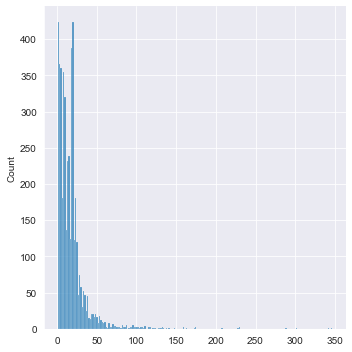

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize=(16, 10))
sns.displot(sentlen)

In [21]:
seqlen = sum(list(map(lambda x: list(map(lambda y: len(y), x)), X)), [])

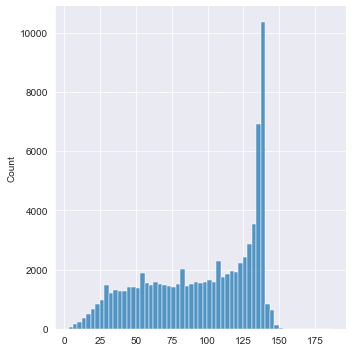

In [22]:
sns.displot(seqlen)

In [35]:
from transformers import AutoTokenizer, TFAutoModel, pipeline
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

bert = TFAutoModel.from_pretrained("bert-base-uncased")


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [36]:
SEQ_LEN = 140

In [37]:
tokens = tokenizer.encode_plus("hello world how are you, I am doing fine", 
                               max_length=SEQ_LEN, 
                               truncation=True, 
                               padding='max_length', 
                               add_special_tokens=True, 
                               return_token_type_ids=False,
                               return_attention_mask=True,
                               return_tensors="tf"
                              )

In [38]:
tokens

{'input_ids': <tf.Tensor: shape=(1, 140), dtype=int32, numpy=
array([[ 101, 7592, 2088, 2129, 2024, 2017, 1010, 1045, 2572, 2725, 2986,
         102,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0, 

In [39]:
XConcat = [' [SEP] '.join(map(lambda x: x.replace(".", ""), x_)) for x_ in X]

In [40]:
Xids = np.zeros((len(X), SEQ_LEN))
Xmask = np.zeros((len(X), SEQ_LEN))

In [41]:
for i, seq in enumerate(XConcat):
    tokens = tokenizer.encode_plus(seq, 
                               max_length=SEQ_LEN, 
                               truncation=True, 
                               padding='max_length', 
                               add_special_tokens=True, 
                               return_token_type_ids=False,
                               return_attention_mask=True,
                               return_tensors="tf"
                              )
    Xids[i, :], Xmask[i, :] = tokens['input_ids'], tokens['attention_mask']

In [42]:
Xids.shape


(4641, 140)

In [43]:
Y = np.asarray(Y)
Y = np.expand_dims(Y, axis=1)

In [44]:
tf.config.experimental.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [45]:
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, Y))

In [46]:
for i in dataset.take(1):
    print(i)

(<tf.Tensor: shape=(140,), dtype=float64, numpy=
array([  101.,  2129.,  2000.,  6869.,  2000.,  1996., 25303.,  2886.,
        2006.,  4918.,  2002.,  2497.,  3527.,  1029.,  2296.,  3780.,
        1999.,  1996.,  2489.,  2088.,  2323.,  6140.,  2023.,  8299.,
        1024.,  1013.,  1013., 22975.,  2080.,  1013.,  8040.,  2475.,
        4140.,  2575.,  2509.,  2546.,  2575.,  3501.,   102.,  1030.,
       28354.,  1035.,  3420.,  1030.,  1047.,  7946., 21426., 12718.,
        4135.,  9397.,  5181.,  3830.,  3087.,  2027.,  2123.,  1005.,
        1056.,  2066.,  2004.,  3424.,  1011.,  4100.,  2618.,  1998.,
        3049.,  2127.,  2008.,  2711.,  1013.,  2194.,  2003.,  2736.,
         102.,  1030., 28354.,  1035.,  3420.,  1030.,  1047.,  7946.,
       21426., 12718.,  4135.,  9397.,  2053.,  2028.,  2515.,   102.,
        1030., 28354.,  1035.,  3420.,  1001., 10047.,  7507., 12190.,
        2666.,  5369.,  2497.,  3527.,   102.,  1030.,  1047.,  7946.,
       21426., 12718.,  4135

In [47]:
def map_function(input_ids, masks, label):
    return {'input_ids': input_ids, 'attention_mask': masks}, label

In [48]:
dataset = dataset.map(map_function)

In [49]:
for i in dataset.take(1):
    print(i)

({'input_ids': <tf.Tensor: shape=(140,), dtype=float64, numpy=
array([  101.,  2129.,  2000.,  6869.,  2000.,  1996., 25303.,  2886.,
        2006.,  4918.,  2002.,  2497.,  3527.,  1029.,  2296.,  3780.,
        1999.,  1996.,  2489.,  2088.,  2323.,  6140.,  2023.,  8299.,
        1024.,  1013.,  1013., 22975.,  2080.,  1013.,  8040.,  2475.,
        4140.,  2575.,  2509.,  2546.,  2575.,  3501.,   102.,  1030.,
       28354.,  1035.,  3420.,  1030.,  1047.,  7946., 21426., 12718.,
        4135.,  9397.,  5181.,  3830.,  3087.,  2027.,  2123.,  1005.,
        1056.,  2066.,  2004.,  3424.,  1011.,  4100.,  2618.,  1998.,
        3049.,  2127.,  2008.,  2711.,  1013.,  2194.,  2003.,  2736.,
         102.,  1030., 28354.,  1035.,  3420.,  1030.,  1047.,  7946.,
       21426., 12718.,  4135.,  9397.,  2053.,  2028.,  2515.,   102.,
        1030., 28354.,  1035.,  3420.,  1001., 10047.,  7507., 12190.,
        2666.,  5369.,  2497.,  3527.,   102.,  1030.,  1047.,  7946.,
       21426.,

In [50]:
batched_dataset = dataset.batch(128)

In [51]:
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(SEQ_LEN), name='attention_mask', dtype='int32')
embeddings = bert(input_ids, attention_mask=mask)[0]

TFX = tf.keras.layers.GlobalMaxPool1D()(embeddings)
TFX = tf.keras.layers.BatchNormalization()(TFX)
TFX = tf.keras.layers.Dense(128, activation='relu')(TFX)
TFX = tf.keras.layers.Dropout(0.1)(TFX)
TFX = tf.keras.layers.Dense(32, activation='relu')(TFX)
TFY = tf.keras.layers.Dense(1, activation='softmax', name='outputs')(TFX)

model = tf.keras.Model(inputs=[input_ids, mask], outputs=TFY)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


In [52]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 140)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 140)]        0                                            
__________________________________________________________________________________________________
tf_bert_model_1 (TFBertModel)   TFBaseModelOutputWit 109482240   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
global_max_pooling1d (GlobalMax (None, 768)          0           tf_bert_model_1[0][0]        

In [53]:
opt = tf.keras.optimizers.Adam(0.01)

In [54]:
loss = tf.keras.losses.BinaryCrossentropy()
acc = tf.keras.metrics.BinaryCrossentropy('accuracy')


model.compile(optimizer=opt, loss=loss, metrics=[acc])

In [55]:
DS_LEN = len([0 for batch in dataset])
SPLIT = 0.9  # 90-10 split

train = batched_dataset.take(round(DS_LEN*SPLIT))  # get first 90% of batches
val = batched_dataset.skip(round(DS_LEN*SPLIT))

In [ ]:
history = model.fit(train, validation_data=val, epochs=40)

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


Epoch 1/40


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


12/37 [========>.....................] - ETA: 15:21 - loss: 0.7047 - accuracy: 0.7047

In [109]:
for i in dataset.take(1):
    print(i)

({'input_ids': <tf.Tensor: shape=(4480,), dtype=float64, numpy=array([ 101., 2129., 2000., ...,    0.,    0.,    0.])>, 'attention_mask': <tf.Tensor: shape=(4480,), dtype=float64, numpy=array([1., 1., 1., ..., 0., 0., 0.])>}, <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0])>)


In [122]:
Y.shape

(4641, 1)

In [94]:
Y[0].shape

(1,)

In [98]:
def keras_model_memory_usage_in_bytes(model, *, batch_size: int):
    """
    Return the estimated memory usage of a given Keras model in bytes.
    This includes the model weights and layers, but excludes the dataset.

    The model shapes are multipled by the batch size, but the weights are not.

    Args:
        model: A Keras model.
        batch_size: The batch size you intend to run the model with. If you
            have already specified the batch size in the model itself, then
            pass `1` as the argument here.
    Returns:
        An estimate of the Keras model's memory usage in bytes.

    """
    default_dtype = tf.keras.backend.floatx()
    shapes_mem_count = 0
    internal_model_mem_count = 0
    for layer in model.layers:
        if isinstance(layer, tf.keras.Model):
            internal_model_mem_count += keras_model_memory_usage_in_bytes(
                layer, batch_size=batch_size
            )
        single_layer_mem = tf.as_dtype(layer.dtype or default_dtype).size
        out_shape = layer.output_shape
        if isinstance(out_shape, list):
            out_shape = out_shape[0]
        for s in out_shape:
            if s is None:
                continue
            single_layer_mem *= s
        shapes_mem_count += single_layer_mem

    trainable_count = sum(
        [tf.keras.backend.count_params(p) for p in model.trainable_weights]
    )
    non_trainable_count = sum(
        [tf.keras.backend.count_params(p) for p in model.non_trainable_weights]
    )

    total_memory = (
        batch_size * shapes_mem_count
        + internal_model_mem_count
        + trainable_count
        + non_trainable_count
    )
    return total_memory

AttributeError: The layer has never been called and thus has no defined output shape.

In [58]:
print(len(train))

37
